In [0]:
import datetime
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [0]:

pod_df=pd.DataFrame(columns=['Name','No. of Episodes'])
file=open("overcast.opml","r")
soup=BeautifulSoup(file,"html.parser")
podcasts=(soup.find_all(type="rss"))
for podcast in podcasts:
	title=podcast['title']
	episodes=podcast.find_all(type="podcast-episode")
	no_of_episodes=episodes.__len__()
	rowadd={'Name':title,'No. of Episodes':no_of_episodes}
	pod_df=pod_df.append(rowadd,ignore_index=True)
pod_df.set_index('Name',drop=True,inplace=True)
print(pod_df)

                                         No. of Episodes
Name                                                    
Roderick on the Line                                   1
Hello Internet                                       118
The Bugle                                              5
Hidden Brain                                           4
What Trump Can Teach Us About Con Law                 33
The Talk Show With John Gruber                       130
Sleep With Me                                          1
1q84                                                   1
Exponent                                             111
You Are Not So Smart                                  41
Connected                                            164
airnewsalerts                                         14
The Indicator from Planet Money                        1
Short Wave                                            12
Radiolab                                             106
Intelligence Squared           

In [0]:
pod_df.sort_values('No. of Episodes',ascending=False, inplace=True)
pod_df

,No. of Episodes
Name,
Economist Radio,411
Planet Money,291
99% Invisible,164
Connected,164
The Talk Show With John Gruber,130
Accidental Tech Podcast,129
Hello Internet,118
Exponent,111
Radiolab,106


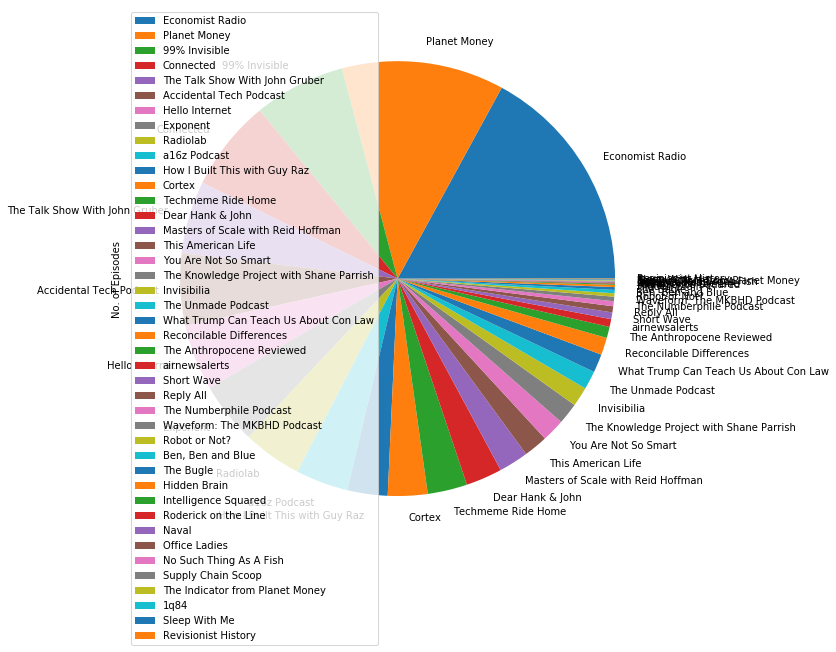

In [0]:
pod_df.plot.pie(y='No. of Episodes',figsize=(10,10))

## Mo *Stats*

In [0]:
day_list=[0,0,0,0,0,0,0]
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [0]:

for podcast in podcasts:
  episodes=podcast.find_all(type="podcast-episode")
  for episode in episodes:
    podcast_date=episode['userupdateddate']
    date_time_obj = datetime.datetime.strptime(podcast_date, '%Y-%m-%dT%H:%M:%S-%f:00')
    day=date_time_obj.weekday()
    day_list[day]=day_list[day]+1
print(day_list)


[423, 339, 400, 388, 358, 322, 180]


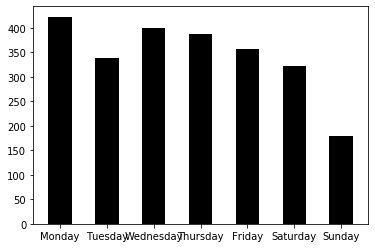

In [0]:
import matplotlib.pyplot as plt
plt.bar(days,day_list,width=0.5,color='black')
plt.show()

## Sum mo stats

In [0]:
hours=[None]*24
for i in range(0,24):
  hours[i]=i
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [0]:
hours=['12am','','','3am','','','6am','','','9am','','','12pm','','','3pm','','','6pm','','','9pm','','']

In [0]:
list_of_hours=[0]*24

In [0]:

for podcast in podcasts:
  episodes=podcast.find_all(type="podcast-episode")
  for episode in episodes:
    podcast_date=episode['userupdateddate']
    date_time_obj = datetime.datetime.strptime(podcast_date, '%Y-%m-%dT%H:%M:%S-%f:00')
    hour=date_time_obj.hour
    minute=date_time_obj.minute
    list_of_hours[hour]=list_of_hours[hour]+1

In [0]:
print(list_of_hours)

[94, 162, 139, 147, 162, 152, 177, 172, 195, 245, 182, 80, 73, 57, 50, 31, 27, 18, 10, 34, 33, 57, 43, 70]


<function matplotlib.pyplot.show>

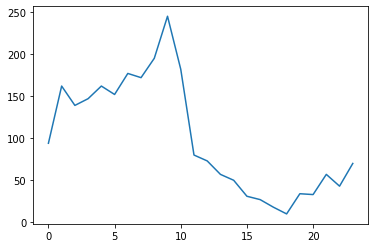

In [0]:
plt.plot(hours,list_of_hours)
plt.show

In [0]:
top_pod_list=list(pod_df.head(15).index.values)
top_pod_list=[s + " Podcast Logo" for s in top_pod_list]

In [0]:
!pip install google_images_download
# importing google_images_download module 
from google_images_download import google_images_download 

# creating object 
response = google_images_download.googleimagesdownload() 




def downloadimages(query): 
	# keywords is the search query 
	# format is the image file format 
	# limit is the number of images to be downloaded 
	# print urs is to print the image file url 
	# size is the image size which can 
	# be specified manually ("large, medium, icon") 
	# aspect ratio denotes the height width ratio 
	# of images to download. ("tall, square, wide, panoramic") 
	arguments = {"keywords": query, 
				"format": "png", 
				"limit":1, 
				"print_urls":True, 
				"size": "medium", 
				"aspect_ratio": "square"} 
	try: 
		response.download(arguments)
  

	
	# Handling File NotFound Error	 
	except FileNotFoundError: 
		arguments = {"keywords": query, 
					"format": "png", 
					"limit":1, 
					"print_urls":True, 
					"size": "medium"} 
					
		# Providing arguments for the searched query 
		try: 
			# Downloading the photos based 
			# on the given arguments 
			response.download(arguments)
		except: 
			pass
# Driver Code 
for pod in top_pod_list: 
	downloadimages(pod) 
	print() 


     |████████████████████████████████| 911kB 14.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=1563688deaaadc355c0da815a910c63c0226a499a7c19c540557a5ace163a829
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download

Item no.: 1 --> Item name = Economist Radio Podcast Logo
Evaluating...
Starting Download...
Image URL: http://cdn-profiles.tunein.com/p604262/images/logog.png?t=152638
Completed Image ====> 1.logog.png

Errors: 0



Item no.: 1 --> Item name = Planet Money Podcast Logo
Evaluating...
Starting Download...
Image URL: https://pbs.twimg.com/profile_images/473888336449269761/vIurMh9f.png
Completed Image ====> 1.vIurMh9f.png

Errors: 0



Item no.: 1 --> Item name = 99% Invisible Podcast Logo
Evaluating...
Starting Download...
Image URL: http://cdn-radiotime-logos.tunein.com/p409554g.png
Completed Image ====

In [0]:
path=[]

In [0]:
response